In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [3]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    df[c] = df[c].fillna('NA')

for n in numerical_columns:
     df[n] = df[n].fillna(0)

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.32
0.52
0.72
0.92

In [5]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

df_train_copy = df_train.copy()
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [6]:
from sklearn.feature_extraction import DictVectorizer

numeric_cols = [c for c in numerical_columns if c != 'converted']

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numeric_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numeric_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
model.intercept_[0]


np.float64(-0.10464329280767921)

In [9]:
model.coef_[0]


array([-1.70311954e-05, -2.70081136e-02,  3.53370481e-02, -9.86757745e-03,
        1.37309559e-02, -1.16835606e-01, -2.20831257e-02,  3.31653305e-02,
       -7.86976322e-03, -2.34146287e-02, -6.79204328e-03, -3.28352253e-02,
       -2.71803966e-02, -1.76334405e-02,  3.25593815e-01,  3.19698115e-02,
        3.39339243e-04, -4.68283380e-03, -2.35995158e-02, -1.12097463e-01,
        6.95060080e-02, -3.41088270e-02,  4.97267101e-03, -1.20171327e-02,
       -9.92570215e-03, -2.76412116e-02, -1.33322515e-02, -1.89990320e-02,
       -2.27905151e-02, -4.91011865e-03,  4.52528283e-01])

In [10]:
y_pred_scores = model.decision_function(X_val)

y_pred_scores


array([ 0.30389758, -0.11770497,  0.48535829,  0.46580005,  0.4785707 ,
        0.73073927,  1.7076798 , -0.4808554 ,  0.23042854,  2.34414245,
        1.23959546,  0.66821889,  2.38587527, -0.47306172,  2.01126943,
        2.14411734,  0.63385778,  0.12326176,  1.00004297,  0.86730474,
        1.27035322,  0.05528784,  2.07751155,  0.95419551,  2.39350727,
        0.13958346,  0.00492339,  1.67137252, -0.06011899,  0.43201456,
        0.53231931,  0.00790824,  0.19727993,  2.42369329,  0.80136505,
        0.64844926,  1.71636818,  1.38301661, -0.10164466,  0.54450661,
        1.57766658, -0.25907667, -0.18235844,  0.35639676,  0.59614629,
        1.02625915,  0.15607311,  0.92452804,  1.05485019,  1.87884216,
        1.24744792,  1.14960265,  1.70841221,  0.72334019,  1.26910797,
        0.79246218,  0.55639611,  0.28004788,  0.70812264,  1.11856621,
       -0.6906781 ,  0.76093365, -0.60427905,  1.23396676,  0.05617326,
       -1.0355533 ,  0.70114515, -0.34055448, -0.02497253,  0.17

In [11]:
y_pred = model.predict_proba(X_val)[:, 1]

y_pred

array([0.57539503, 0.47060769, 0.61901236, 0.6143892 , 0.61741031,
       0.67496748, 0.8465351 , 0.38205016, 0.55735358, 0.91246751,
       0.77549359, 0.66110422, 0.91574386, 0.38389183, 0.88197523,
       0.89511778, 0.65336369, 0.53077648, 0.73106703, 0.70418456,
       0.78080321, 0.51381844, 0.88869813, 0.72195815, 0.91633086,
       0.53483932, 0.50123084, 0.84175873, 0.48497478, 0.60635462,
       0.63002389, 0.50197705, 0.54916065, 0.91861628, 0.6902664 ,
       0.65666092, 0.84766044, 0.79947504, 0.47461069, 0.63286015,
       0.82887379, 0.4355907 , 0.45453631, 0.58816791, 0.64477414,
       0.73619001, 0.53893927, 0.71596383, 0.74170518, 0.86747808,
       0.77685777, 0.75943833, 0.84663023, 0.67334212, 0.78059001,
       0.68835976, 0.63561826, 0.56955796, 0.6699862 , 0.75372267,
       0.33388224, 0.68155641, 0.35336533, 0.7745121 , 0.51403962,
       0.2620089 , 0.66844162, 0.41567479, 0.49375719, 0.54251895,
       0.85677057, 0.39794252, 0.46701359, 0.85106564, 0.77222

In [12]:
converted_decision = (y_pred >= 0.5)

(y_val == converted_decision).mean()

np.float64(0.6996587030716723)

In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
score = round(roc_auc_score(y_val, y_pred),3)

In [15]:
print(score)

0.817


This score is closest to 0.92. Hence selecting 0.92 as answer

Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.145
0.345
0.545
0.745


In [16]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
scores = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [17]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)

,threshold,tp,fp,fn,tn,recall,precision
0,0.00,171,122,0,0,1.0,0.583618
1,0.01,171,122,0,0,1.0,0.583618
2,0.02,171,122,0,0,1.0,0.583618
3,0.03,171,122,0,0,1.0,0.583618
4,0.04,171,122,0,0,1.0,0.583618


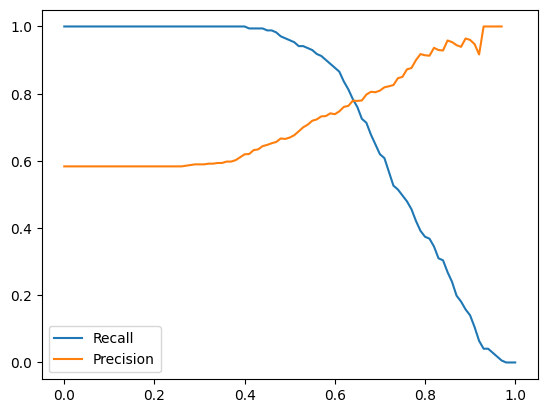

In [18]:
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.legend()
df_scores.head()

In [19]:
df_scores.tail()

,threshold,tp,fp,fn,tn,recall,precision
96,0.96,3,0,168,122,0.017544,1.0
97,0.97,1,0,170,122,0.005848,1.0
98,0.98,0,0,171,122,0.000000,NaN
99,0.99,0,0,171,122,0.000000,NaN
100,1.00,0,0,171,122,0.000000,NaN


The precision and Recall Curves intersect at threshold = 0.745. Hence Ansser is 0.745

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F
1
=
2
⋅
P
⋅
R
P
+
R

Where 
P
 is precision and 
R
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [20]:
df_scores['F1_score'] = (2*df_scores.precision*df_scores.recall)/ (df_scores.precision + df_scores.recall)

In [21]:
f1_score_max = df_scores.F1_score.max()

In [23]:
df_scores[(df_scores.F1_score == f1_score_max)]



,threshold,tp,fp,fn,tn,recall,precision,F1_score
57,0.57,156,57,15,65,0.912281,0.732394,0.8125


So at threshold 0.57 the F1_score is maximal.Hence closest answer is 0.54

In [29]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns + numeric_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear' C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [41]:
dv, model = train(df_train, y_train, C=0.001)

In [42]:
def predict(df, dv, model):
    dicts = df[categorical_columns + numeric_cols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [43]:
y_pred = predict(df_val, dv, model)

In [44]:
from sklearn.model_selection import KFold

In [45]:
!pip install tqdm

In [46]:
from tqdm.auto import tqdm

In [47]:
n_splits = 5

#for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('Standard Deviation acorss 5 folds is' ,  np.std(scores))

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Standard Deviation acorss 5 folds is 0.011376101170855739


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.561 +- 0.024
C=0.001 0.868 +- 0.019


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=1 0.920 +- 0.011


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
